# Introduction to Bayesian Statistics

In [1]:
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
#from scipy import stats

import sys
sys.path.append("../PythonScripts/")

from prereqs import *

If you've ever taken an introductory statistics course, you've probably been taught what is referred to as  "classical statistics" (aka "frequentist"), a statistical perspective pioneered by Pearson and Neyman and others. Classical statistics relies on the idea of likelihood, and maximizing likelihood as a method of making inferences of unknown parameters.

In this course we will explore what can be referred as an alternative statistical theory. The main difference between classical statistics is that given an unkown parameter $\theta$, the classical perspective will treat this unkown variable as a fixed value that needs to be estimated. However, Bayesian theory would threat $\theta$ as a random variable that can be described by a prior distribution $\theta \sim p(\theta)$.

Bayesian theory has been around for many years, however, it had not taken a strong foothold due to the inability to fully calculate complex posterior distributions. However, with the advancement of computation and Monte Carlo algorithms, it taken a foothold as a serious competing theory due to classical theory.

## Statistical Models


One of the most important issues in statistical science is the construction of probabilisitc models that represent, or sufficiently approximate, the true generating mechanism of a phenomenon under study. The construction of such models is usually based on probabilistic and logical arguments concerning the nature and function of a given phenonmemon.

Assume a random variable Y, called *response*, which follows a probabilistic rule with density or probability function $f | \mathbf{\theta})$.  Statistical models typically involve multiple observations (random variable), $y_1, ..., y_n \sim f(y| \mathbf{\theta})$. Assume these random variables are independent and identically distributed (*i.i.d.*) by $f$. Here, $\mathbf{\theta}$ can represent many parameters such as $\mathbf{\theta} = (\theta_1, ..., \theta_p)^T$. However, in most simple problems, $p$ will just be one or two.

We can describe a sample of these random variables with vector notation as $\mathbf{y} = (y_1, ..., y_n)^T$ where `T` indicates transposing of the row vector so that y is an $n \times 1$ column vector.

The joint distribution of this random sample is 
$$
L(\mathbf{\theta} | \mathbf{y}) = f(\mathbf{y} | \mathbf{\theta}) = \prod_{i=1}^n f(y_i | \mathbf{\theta})
$$

This is also called the *likelihood* and contains the availble information provided by the observed sample.

In most cases, when making inferences on $\mathbf{\theta}$, classical theory relies on only the information the likelihood provides. Bayesian statistics, however, typically begins with prior information about the distribution of $\mathbf{\theta} \sim p(\mathbf{\theta})$. It uses Bayes' Theorem and the random data $\mathbf{y}$, with sampling density $f(y | \mathbf{\theta})$, to update this information into a posterior density $p(\mathbf{\theta} | \mathbf{y})$ that incorporates both the information from the likelilhood and prior.


Bayes' Theorem tells us that 

$$
\begin{aligned}
p(\mathbf{\theta} | \mathbf{y}) = \frac{f(y| \mathbf{\theta}) p(\mathbf{\theta})}{\int f(y| \mathbf{\theta}) p(\mathbf{\theta}) d \theta}
\end{aligned}
$$


## Bayes Theorem


Bayes' Theorem relies on conditional probability. Suppose there is an event space \{A, B, C, D\}. We are trying to predict the probability of even B given current information. We are told that event A has occurred. Everything outside of A is then to no longer considered (ignore C, D). The probability of B given A is the joint probability of A and B occuring, divided by the probability of A.

$$
\begin{aligned}
P(B | A) & = \frac{P(A \cap B)}{P(A)} \\
& = \frac{P(A | B) P(B)}{P(A)}
\end{aligned}
$$

And in a simpler form, ignoring the scaling factor $P(A)$,

$$
\begin{aligned}
P(B | A) = & = \frac{P(A | B) P(B)}{P(A)} \propto P(A \cap B)
\end{aligned}
$$



Of course, this is a quite simple example. 

Let's consider a situation where A is made up of multiple other events, such as $A = A_1 \cup A_2 \cup ... \cup A_n$ for which each $A_i$ is independent of the others. Now, we are interested in the probability $P(A_i | B)$. Then, Bayes' Theorem provides the following expression

$$
\displaystyle
\begin{aligned}
P(A_i | B)  = \frac{P(B | A_i) P(A_i)}{\sum_{i=1}^{n} P(B | A_i) P(A_i)} \propto P(B | A_i) P(A_i)
\end{aligned}
$$

The denominator, $\sum_{i=1}^{n} P(B | A_i) P(A_i)$ , can be referred to as the *law of total probability*.



Bayesian statistics differ from the classical statistical theory since all unkown parameters are considrered as random variable. For this reason, *prior distribituion* must be defined *a priori*. This prior distribution expresses the information available to the researcher before any "data" are involved in the statistical analysis. Interest lies in calcuation of the *posterior distribution* $f(\mathbf{\theta} | \mathbf{y})$ of the parameters $\mathbf{\theta}$ given the observed data $\mathbf{y}$. According to Bayes theorem, the posterior dis



The general steps in model building for Bayesian inference can be described as follows:

1. Identify the main variable of the problem (i.e. reponse variable) and its corresponding data

2. FInd a distribution that adequately describes the response variable

3. Identify other variables that may explain the variance of Y (i.e. covariates or explanatory variables)

4. Build a structure for the parameters of the distribution

5. Specify the prior distribution 

6. Write down the likelihood of the model

7. Identify the posterior distribution using analytically, asymptotically, or simulation techniques

8. Calculate posterior summaries and visualize the posterior distribution


## Example: Bernoulli

Suppose you're recording flips on a coin from Fair Coins Corporation. Suppose, based on historical experience from this company, you know the CEO is a cheat, and manufacturers coins that are unfairly biased towards tails with an average probability of $\theta = 0.56$. He states that their coins are now well balanced, but now you've come to inspect.

You take a random sample of 10000 coins and flip each once. If each coin is fair, the number of heads and tails should be approximately 50-50.

Here is your data:

In [13]:
n = 100000
truetheta = 0.54
u = np.random.uniform(low = 0, high = 1, size=n)
results = np.int64(u > truetheta) ## heads: 0, tails: 1
results

tails = sum(results)
heads = n - tails


### Data model

$y_i \sim Bernoilli(\theta)$ and $\theta \sim \beta(a = 4, b = 3)$ 

The Beta(4, 3) distribution has a mean of 0.56.

The likelihood is

$$
\begin{aligned}
L(\theta | \mathbf{y}) & = \prod_{i=1}^n f(y_i | \theta) \\
\ & =  \prod_{i=1}^n \theta^{y_i} (1 - \theta)^{1 - y} = \theta^{\sum_i^n y_i} (1 - \theta)^{n - \sum_i^n y_i}
\end{aligned}
$$


The posterior distribution is then

$$
\begin{aligned}
P(\theta | \mathbf{y}) & \propto  L(\theta | \mathbf{y}) P(\theta | a = 4, b = 3) \\
\ & = \theta^{\sum_i^n y_i} (1 - \theta)^{n - \sum_i^n y_i} \times \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)} \theta^{a - 1} (1 - \theta)^{b - 1} \\
\ & =  \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)} \times \theta^{\sum_i^n y_i + a - 1} (1 - \theta)^{n - \sum_i^n y_i + b - 1} \\
\ & \propto Beta(\sum_i^n y_i + a , n - \sum_i^n y_i + b)
\end{aligned}
$$


Thus, our posterior distribution is $Beta(\sum_i^n y_i + 4 , 10000 - \sum_i^n y_i + 3)$. This data model is called Beta-Binomial distribution.

In [14]:
dbeta = stats.beta.pdf
rbeta = lambda n, a, b: np.random.beta(size = n, a  = a, b = b )

In [15]:
?rbeta

In [16]:
posterior = rbeta(n, a = 4, b = 3)

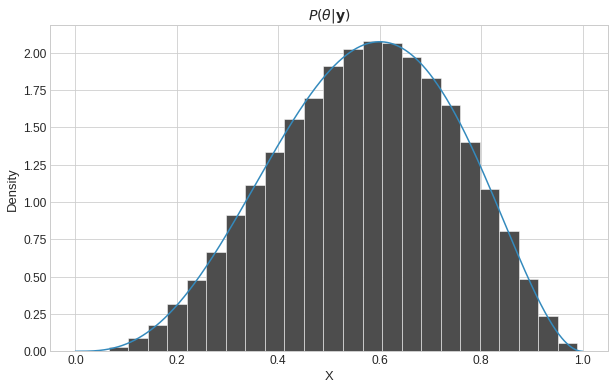

In [17]:
x = np.linspace(start=0, stop = 1, num=1000)
lines(x, dbeta(x, a = 4, b = 3))
hist(posterior, bins = 25, title = r"$P(\theta | \mathbf{y})$")


In [18]:
summary(posterior)

 Min.: 0.0271
 1st Qu.: 0.4466
 Median: 0.579
 3rd Qu.: 0.7037
 Max.: 0.9898
 Mean: 0.5717
